# Carry Tables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import random
import math
import pickle
from tqdm.notebook import tqdm_notebook
import sys
sys.path.append('../')
import fn

/Users/cutterdawes/Desktop/Princeton/Thesis/Repo/statistical/../fn.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%load_ext autoreload
%autoreload 2

## Display Carry Tables

In [97]:
b=4 #modulus

basic_table=1*(np.add.outer(np.arange(b),np.arange(b))>=b)
alt_table=np.array([[0,0,0,0],
                    [0,3,3,3],
                    [0,3,3,0],
                    [0,3,0,0]])

### Basic Table, depth $\in [1:3]$

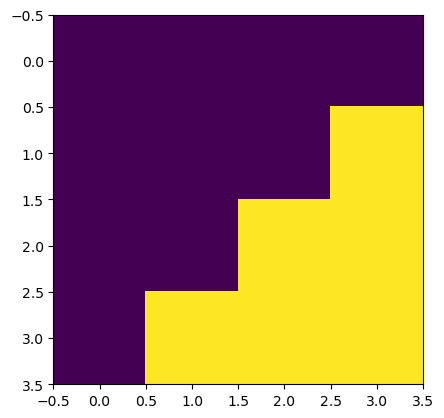

In [98]:
plt.imshow(fn.construct_product_table(basic_table, 1))

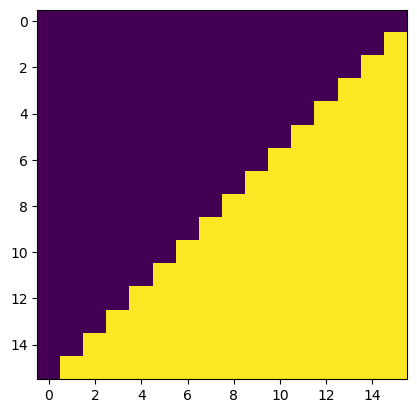

In [99]:
plt.imshow(fn.construct_product_table(basic_table, 2))

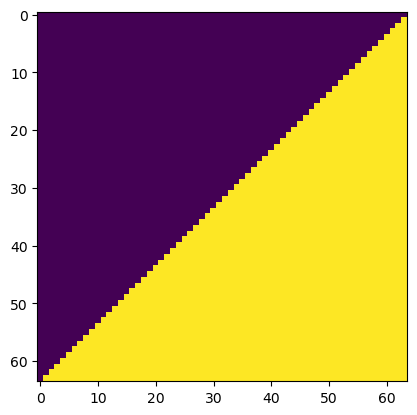

In [100]:
plt.imshow(fn.construct_product_table(basic_table, 3))

### Alternative Table, depth $\in [1:4]$

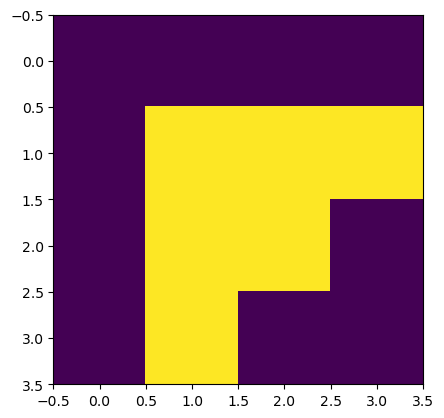

In [101]:
plt.imshow(fn.construct_product_table(alt_table, 1))

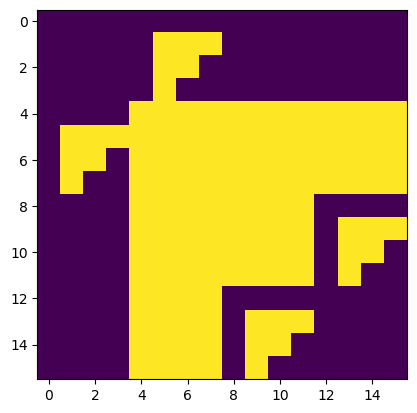

In [102]:
plt.imshow(fn.construct_product_table(alt_table, 2))

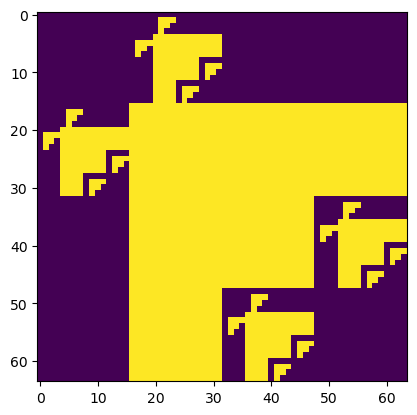

In [103]:
plt.imshow(fn.construct_product_table(alt_table, 3))

## Compare Carry Tables

### Find alternative cocycles

In [248]:
tables2 = fn.construct_tables(2, depth=3)

  0%|          | 0/1 [00:00<?, ?it/s]

In [250]:
tables3 = fn.construct_tables(3, depth=3, sample=20)

  0%|          | 0/3 [00:00<?, ?it/s]

In [251]:
tables4 = fn.construct_tables(4, depth=3, sample=20)

  0%|          | 0/16 [00:00<?, ?it/s]

In [252]:
tables5 = fn.construct_tables(5, depth=3, sample=20)

  0%|          | 0/125 [00:00<?, ?it/s]

In [254]:
tables6 = fn.construct_tables(6, depth=3, sample=20)

  0%|          | 0/1296 [00:00<?, ?it/s]

In [257]:
tables7 = fn.construct_tables(7, depth=3, sample=20)

  0%|          | 0/16807 [00:00<?, ?it/s]

In [258]:
tables8 = fn.construct_tables(8, depth=3, sample=20)

  0%|          | 0/262144 [00:00<?, ?it/s]

In [262]:
all_tables = {
    2: tables2,
    3: tables3,
    4: tables4,
    5: tables5,
    6: tables6,
    7: tables7,
    8: tables8,
}

### Plot carry tables

In [4]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

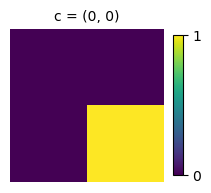

In [280]:
fn.show_tables(all_tables[2], 2, depth=1)

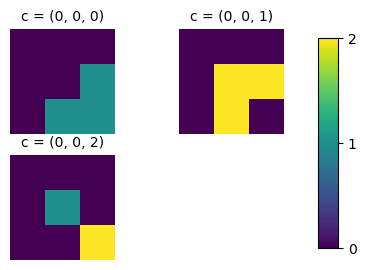

In [281]:
fn.show_tables(all_tables[3], 3, depth=1)

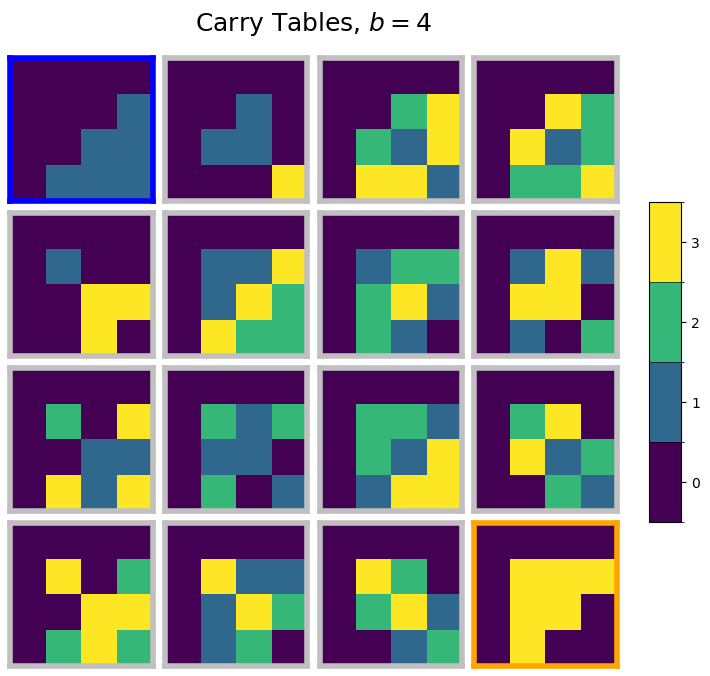

In [86]:
fn.show_tables(all_tables[4], 4, depth=1, savefig=False)

In [ ]:
fn.show_tables(all_tables[5], 5, depth=1)

In [ ]:
fn.show_tables(all_tables[6], 6, depth=1)

In [ ]:
fn.show_tables(all_tables[7], 7, depth=1)

In [ ]:
fn.show_tables(all_tables[8], 8, depth=1)

In [ ]:
fn.show_tables(all_tables[9], 9, depth=1)

### Compute fraction of zeros, number of unique digits, and estimated box-counting dimension for each table

In [ ]:
with open('../pickles/carry_tables/all_tables_d1.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [264]:
with open('../pickles/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [265]:
with open('../pickles/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

In [266]:
with open('../pickles/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

### Plot fraction of zeros, number of unique digits, and estimated box-counting dimension

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(frac_zeros_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 1, 5))
        if (i == 3) or (i == 7):
            ax.set_ylabel('fraction of zeros')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Fraction of Zeros vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(num_digits_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_yticks(range(i+4))
        ax.set_xlabel('depth')
        if (i == 3) or (i == 7):
            ax.set_ylabel('number of digits')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Number of Digits vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(est_dim_box_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
        if (i == 3) or (i == 7):
            ax.set_ylabel('est. box-counting dim.')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()

## Figure showing recursive structure

In [12]:
from matplotlib.colors import BoundaryNorm

In [13]:
b = 3
tables = all_tables[b]

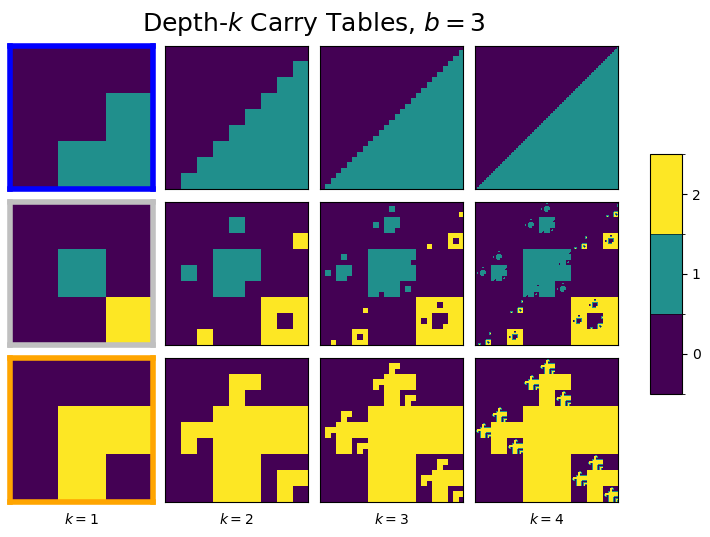

In [17]:
# create fig, axes
fig, axes = plt.subplots(3, 4, figsize=(2*4, 2*3))
fig.suptitle('Depth-$k$ Carry Tables, '+ r'$b =$' + str(b), fontsize=18, y=0.94)

# sort table_dict
tables = {dc: tables[dc] for dc in sorted(tables.keys())}

# iterate through table_dict
i = 0
for dc, table in tables.items():

    # classify as standard, alt. unit, or other carry
    if (np.array(dc) == 0).all():
        carry_type = 'Standard'
        color = 'blue'
    elif len(np.unique(table)) == 2:
        carry_type = 'Alt. Unit'
        color = 'orange'
    else:
        carry_type = 'Other'
        color = 'silver'

    # construct product table
    for j in range(0, 4):
        depth = j + 1
        product_table = fn.construct_product_table(table, depth)

        # display image, increment i
        ax = axes[i, j]
        if j == 0:
            fn.add_border(ax, color=color, width=4)
        levels = np.linspace(-0.5, b-0.5, b+1)
        norm = BoundaryNorm(levels, ncolors=256)
        im = ax.imshow(product_table, cmap='viridis', norm=norm)
        # ax.set_title(carry_type, fontsize=10)
    
    i += 1

# turn off axis ticks and labels
for ax in axes.flatten():
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# add labels
for j, ax in enumerate(axes[b-1,:]):
    ax.set_xlabel(f'$k={j+1}$')

# add colorbar
plt.tight_layout()
fig.subplots_adjust(left=0.12, right=0.88, bottom=0.12, top=0.88)
cbar_ax = fig.add_axes([0.92, 0.3, 0.04, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True)
cbar.set_ticks(range(b))

plt.savefig(f'../figures/tables{b}_recursion.png', dpi=300)

## Plot Frequency of Carrying

In [144]:
with open('../pickles/complexity_measures/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

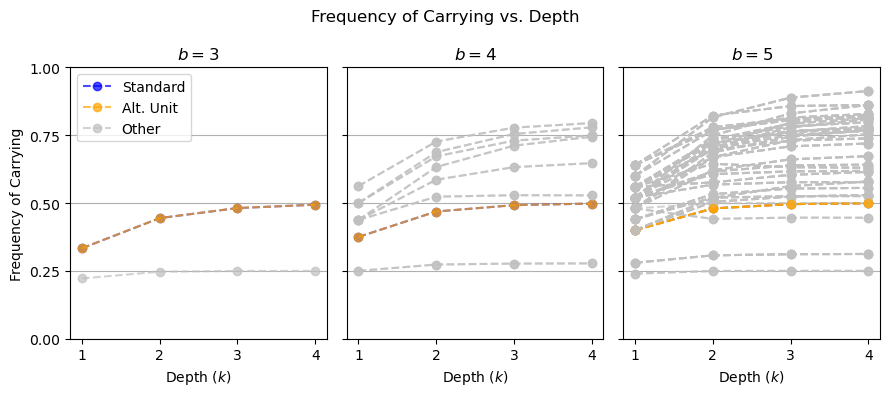

In [168]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    b = i+3
    tables = all_tables[b]
    for dc in tables.keys():
        carry_freq = 1 - np.array(frac_zeros_vs_depth[b][dc])
        if (np.array(dc) == 0).all():
            std, = ax.plot(carry_freq, color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(carry_freq, color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            other, = ax.plot(carry_freq, color='silver', alpha=0.7, marker='o', linestyle='--', label='Other')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.linspace(0, 1, 5))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Frequency of Carrying')
        ax.legend(handles=[std, alt_unit, other], loc='upper left')
    ax.set_title(f'$b = {b}$')
fig.suptitle('Frequency of Carrying vs. Depth')
plt.tight_layout()
plt.savefig('../figures/carry_freq.png', dpi=300)

## Plot Number of Unique Carries

In [146]:
with open('../pickles/complexity_measures/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

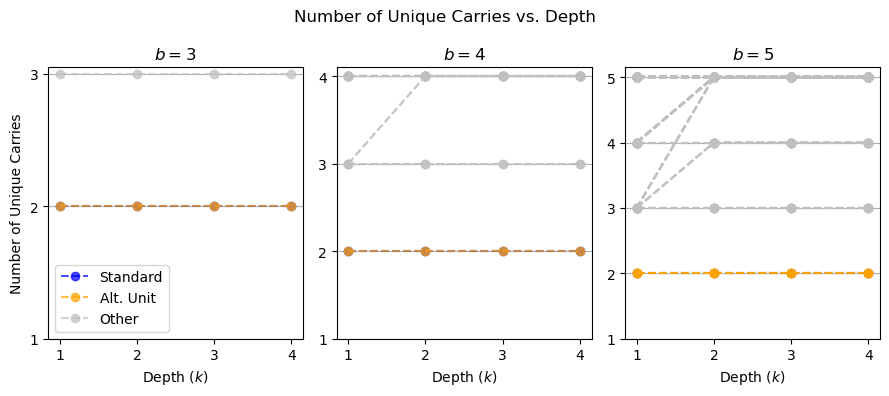

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
for i in range(len(axes)):
    ax = axes[i]
    b = i+3
    tables = all_tables[b]
    for dc in tables.keys():
        num_digits = num_digits_vs_depth[b][dc]
        if (np.array(dc) == 0).all():
            std, = ax.plot(num_digits, color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(num_digits, color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            other, = ax.plot(num_digits, color='silver', alpha=0.7, marker='o', linestyle='--', label='Other')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.arange(1, b+1))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Number of Unique Carries')
        ax.legend(handles=[std, alt_unit, other], loc='lower left')
    ax.set_title(f'$b = {b}$')
fig.suptitle('Number of Unique Carries vs. Depth')
plt.tight_layout()
plt.savefig('../figures/num_carries.png', dpi=300)

## Plot Estimated Fractal Dimension

In [5]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

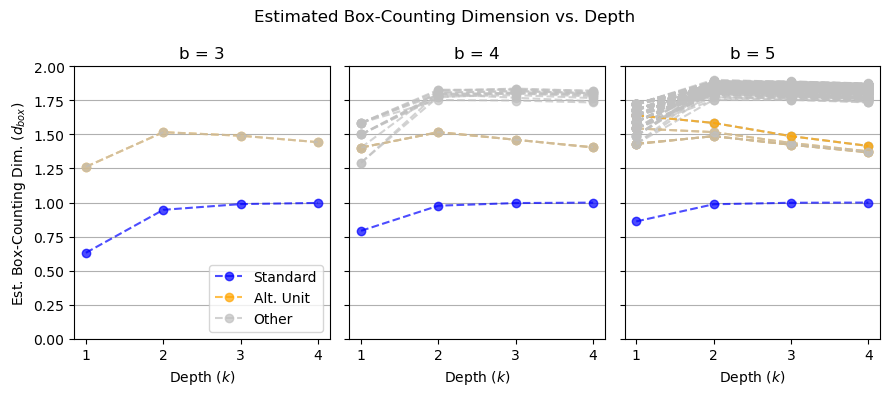

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    tables = all_tables[i+3]
    for dc in tables.keys():
        if (np.array(dc) == 0).all():
            std, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            other, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='silver', alpha=0.7, marker='o', linestyle='--', label='Other')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.linspace(0, 2, 9))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Est. Box-Counting Dim. ($d_{box}$)')
        ax.legend(handles=[std, alt_unit, other], loc='lower right')
    ax.set_title('b = '+str(i+3))
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()
plt.savefig('../figures/dim_box.png', dpi=300)

## Figure for all carry tables in base 5

In [21]:
b = 5

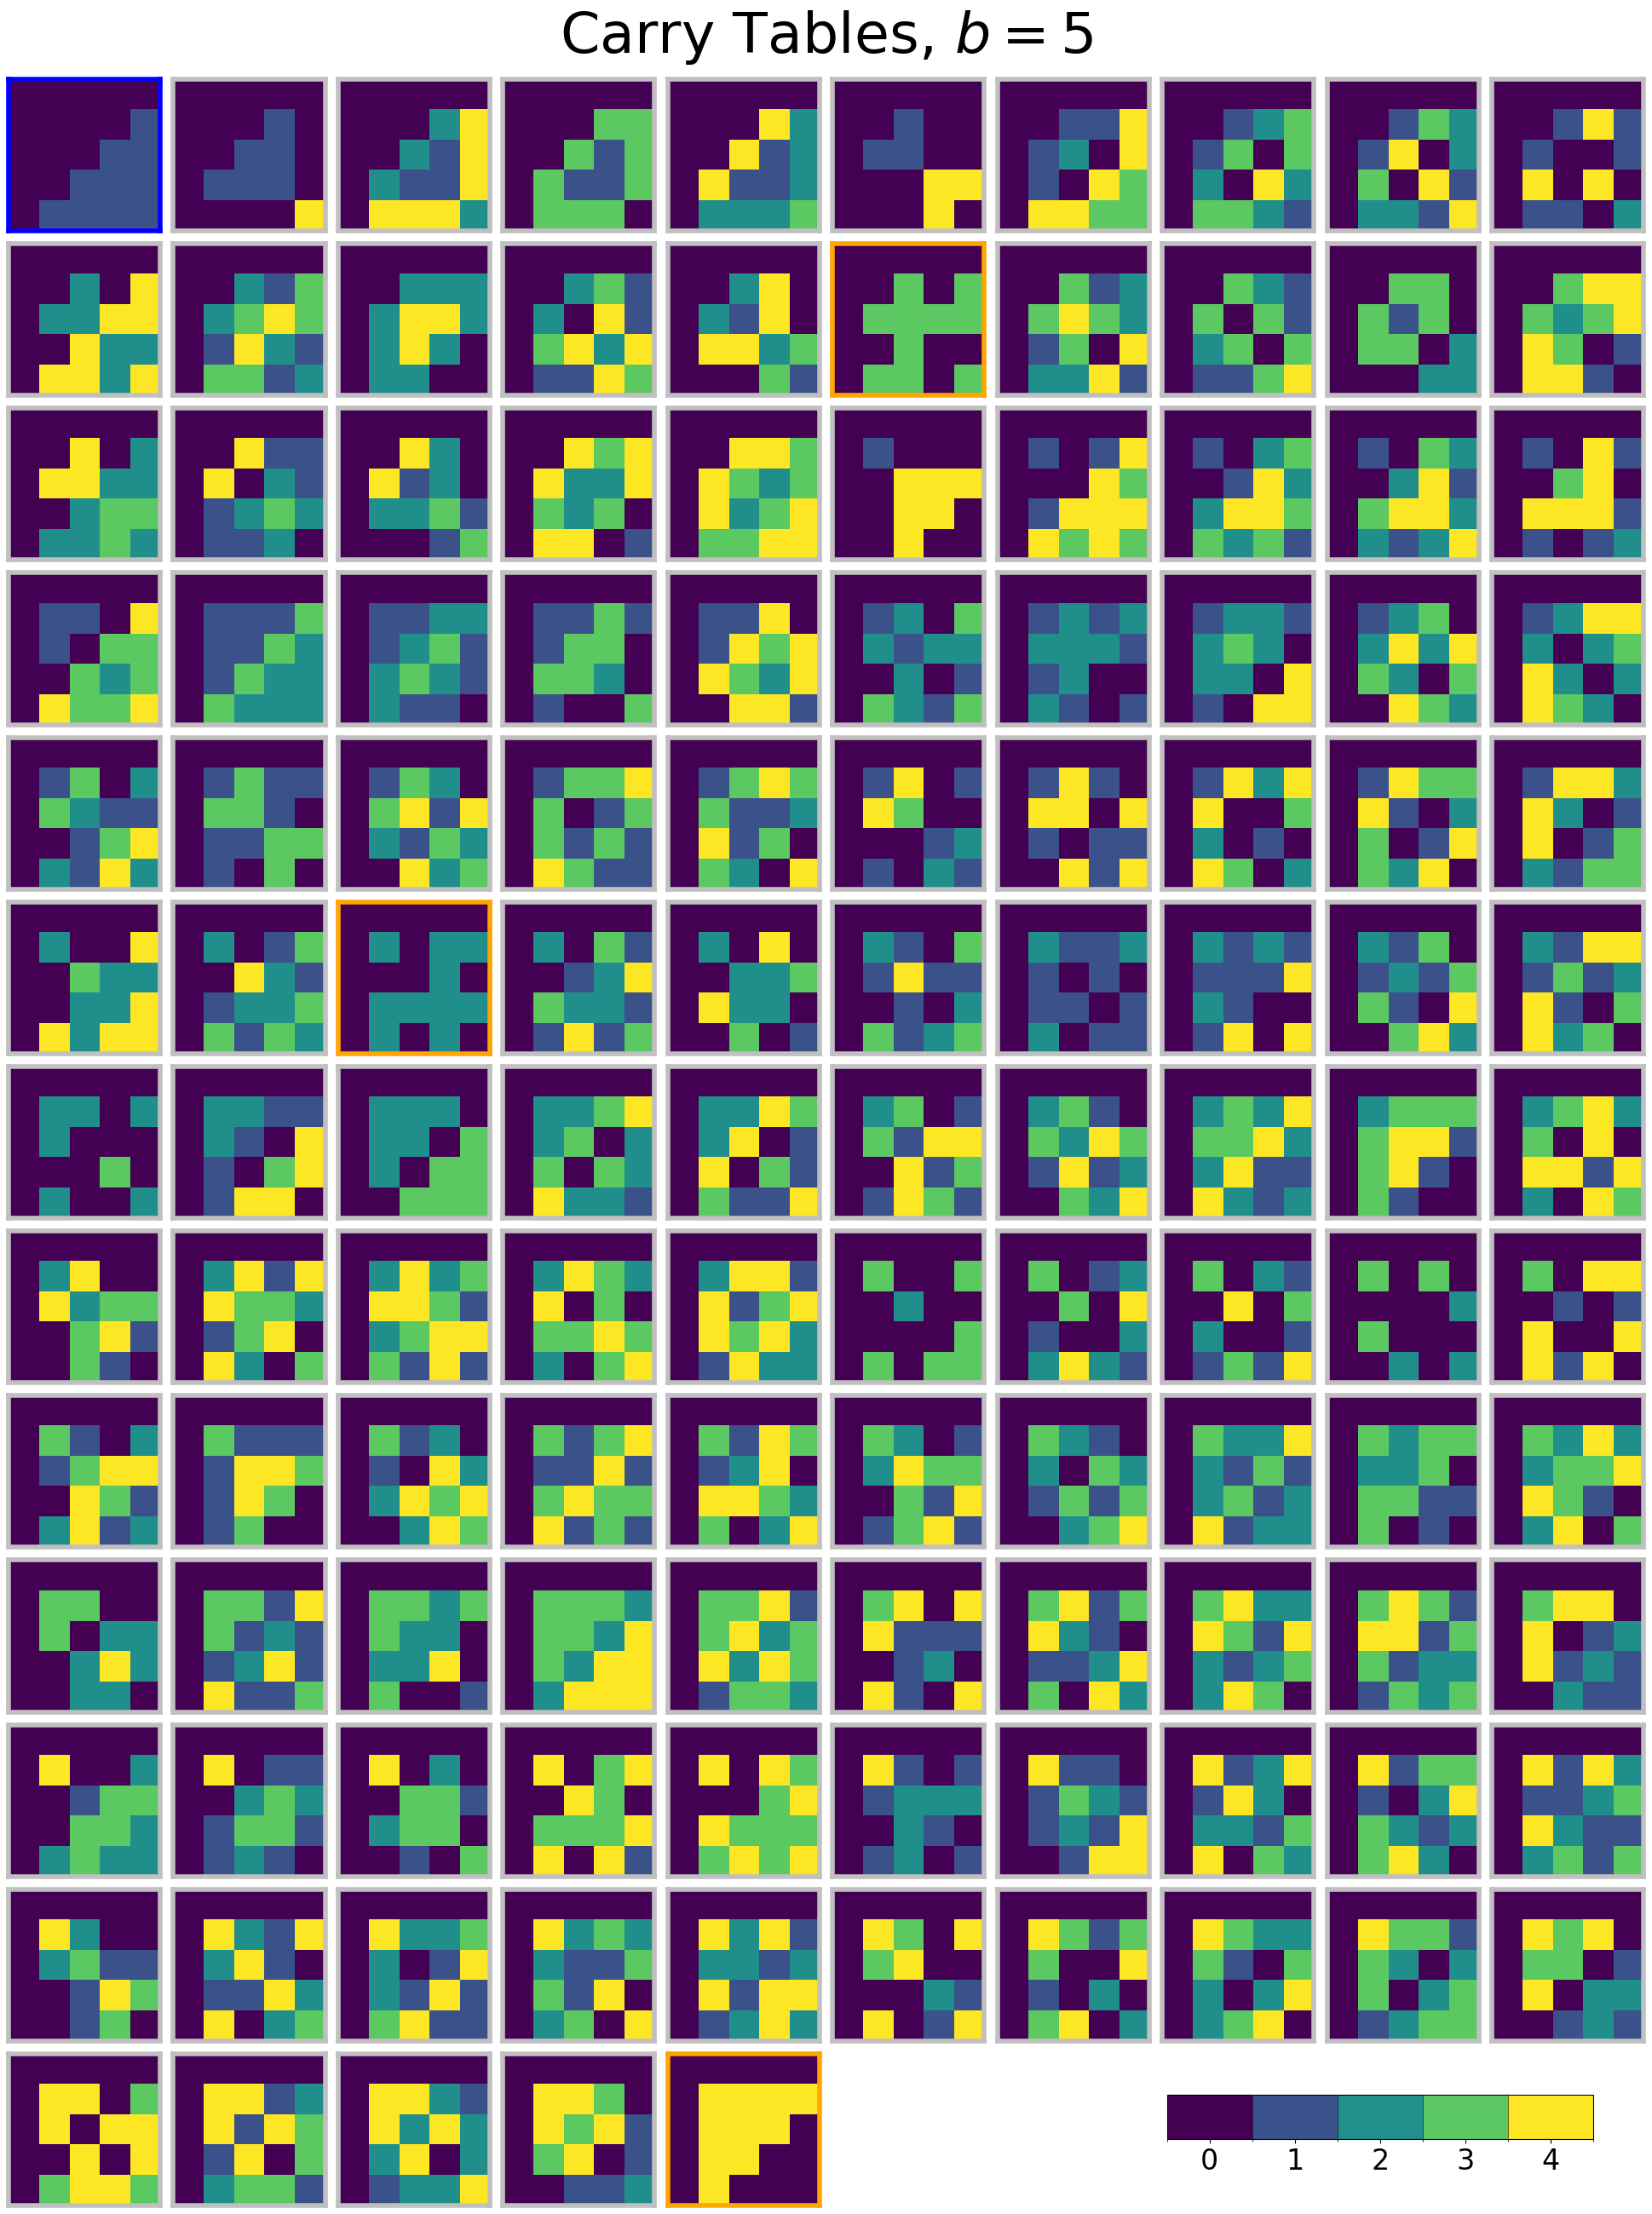

In [47]:
fig, axes = plt.subplots(13, 10, figsize=(2*10, 2*13))
fig.suptitle('Carry Tables, $b = 5$', fontsize=48, y=0.992)
axes = axes.flatten()

# sort table_dict
all_tables[b] = {dc: all_tables[b][dc] for dc in sorted(all_tables[b].keys())}

# iterate through table_dict
i = 0
for dc, table in all_tables[b].items():

    # classify as standard, alt. unit, or other carry
    if (np.array(dc) == 0).all():
        carry_type = 'Standard'
        color = 'blue'
    elif len(np.unique(table)) == 2:
        carry_type = 'Alt. Unit'
        color = 'orange'
    else:
        carry_type = 'Other'
        color = 'silver'

    # display image, increment i
    ax = axes[i]
    fn.add_border(ax, color=color, width=4)
    levels = np.linspace(-0.5, b-0.5, b+1)
    norm = BoundaryNorm(levels, ncolors=256)
    im = ax.imshow(table, cmap='viridis', norm=norm)
    i += 1

# turn off axis ticks and labels
for j, ax in enumerate(axes):
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if j >= i:
        ax.axis('off')


# add colorbar
plt.tight_layout()
fig.subplots_adjust(bottom=0, top=0.96, left=0.02, right=0.98)
cbar_ax = fig.add_axes([0.7, 0.03, 0.25, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True, orientation='horizontal')
cbar.set_ticks(range(b))
cbar.ax.tick_params(labelsize=24)

plt.savefig(f'../figures/tables5_d1.png', dpi=300)

## Investigate extent of associativity

In [48]:
from base import BaseElt

In [50]:
from itertools import product, combinations

In [ ]:
# initialize overall dictionary
all_associativity = {}

# iterate through bases
for b in range(3, 6):

    # initialize dictionary
    associativity = {}
    depth = 3

    # iterate through tables
    for dc, table in all_tables[b].items():
        tuples = list(product(*[range(b)]*depth))
        if depth > 3:
            tuples = random.sample(tuples, b**3)
        num_assoc = 0
        triplets = list(combinations(tuples, 3))
        for (n, m, p) in triplets:
    
            # convert to group elements
            n = BaseElt(n, table)
            m = BaseElt(m, table)
            p = BaseElt(p, table)
    
            # check associativity
            s1 = (n + m) + p
            s2 = n + (m + p)
            is_assoc = s1.vals == s2.vals
            if is_assoc:
                num_assoc += 1
    
        # add fraction of associativity to dictionary
        associativity[dc] = num_assoc / len(triplets)

    # add to overall dictionary
    all_associativity[b] = associativity

In [ ]:
with open(f'../pickles/complexity_measures/associativity_d{depth}.pickle', 'wb') as f:
    pickle.dump(all_associativity, f)